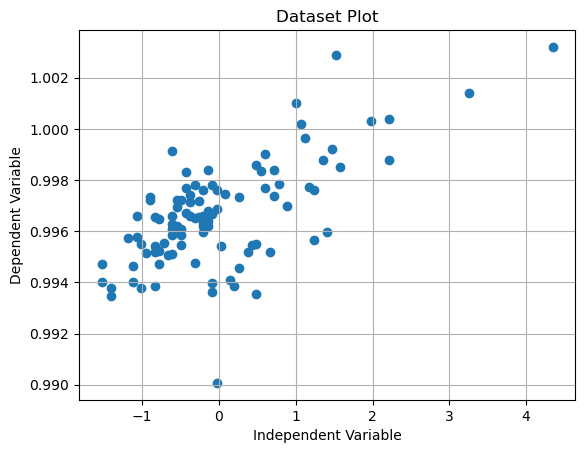

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

x=pd.read_csv('linearX.csv')
y=pd.read_csv('linearY.csv')
x=(x-x.mean())/x.std()
plt.title('Dataset Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(True) 
X=x.iloc[:,0]
Y=y.iloc[:,0]
plt.scatter(X,Y)
plt.show()  

Final Parameters (theta): [0.9966201 0.0013402]
Final Cost Function Value: 1.1947898109836605e-06


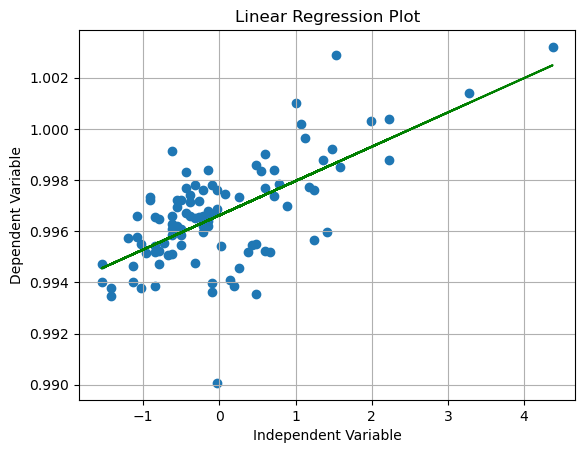

In [73]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('linearX.csv').reshape(-1, 1)
y = np.loadtxt('linearY.csv').reshape(-1, 1)
X = (X - np.mean(X)) / np.std(X)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

alpha = 0.5
iterations = 500
convergence_threshold = 1e-6
theta = np.zeros((X.shape[1], 1))
costs=[]

for i in range(iterations):
    predictions = np.dot(X, theta)
    errors = predictions - y
    gradient = np.dot(X.T, errors) / len(y)
    theta -= alpha * gradient
    cost = np.sum(errors**2) / (2*len(y))
    costs.append(cost)
    if cost < convergence_threshold:
        break

print("Final Parameters (theta):", theta.flatten())
cost = (1 / (2 * len(y))) * np.sum((predictions - y) ** 2)
print("Final Cost Function Value:", cost)

plt.title('Linear Regression Plot')
plt.scatter(X[:, 1], y, label='Data Points')
plt.plot(X[:, 1], predictions.flatten(), color='green', label='Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(True)
plt.show()


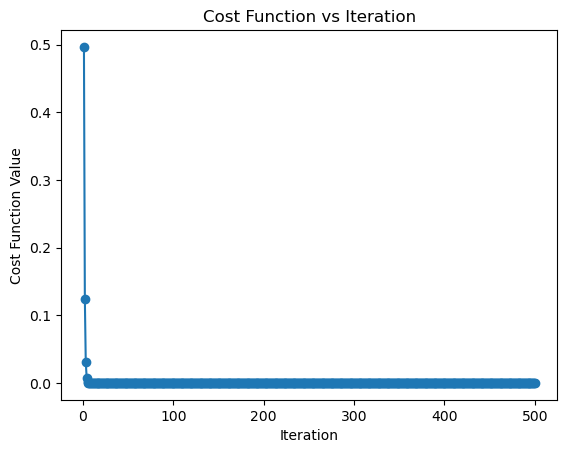

In [74]:
plt.plot(range(1,1+len(costs)), costs, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iteration')
plt.show()

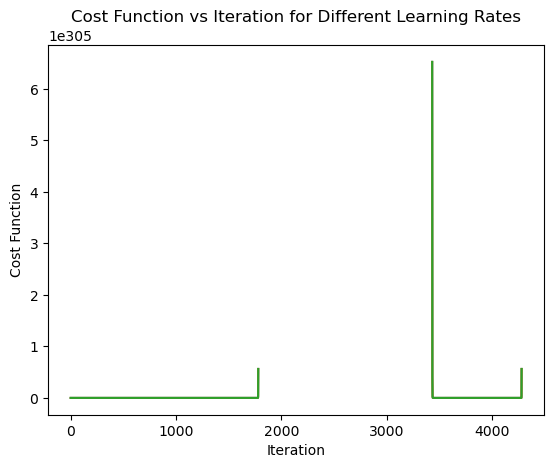

In [150]:
learning_rates = [0.005, 0.5, 5]
for alpha in learning_rates:
    iterations=500
    for i in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / len(y)
        theta -= alpha * gradient
        cost = np.sum(errors**2) / (2*len(y))
        costs.append(cost)
        if cost < convergence_threshold:
            break
    plt.plot(range(len(costs)), costs, label=f'LR={alpha}')

plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.show()

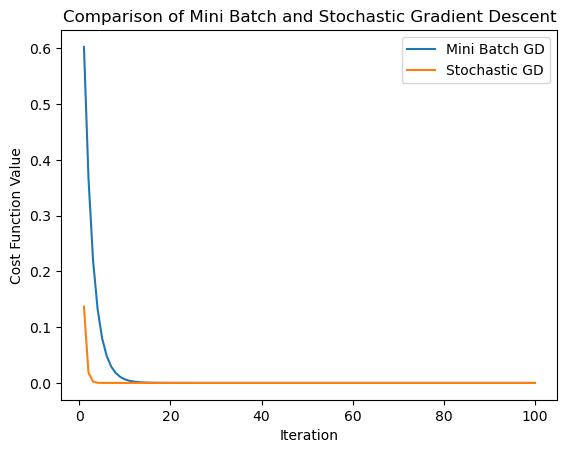

In [156]:
num_iterations = 100
convergence_threshold = 1e-6
alpha = 0.01

def stochastic_gd(X, y, num_iterations, convergence_threshold):
    theta = np.zeros(X.shape[1])
    costs = []

    for iteration in range(num_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            predictions = np.dot(X_i, theta)
            errors = predictions - y_i
            gradient = X_i.T.dot(errors)
            theta = theta - (alpha * gradient)

        cost = np.sum((np.dot(X, theta) - y)**2) / (2*len(y))
        costs.append(cost)
        if cost < convergence_threshold:
            break
    return theta, costs

def minibatch_gd(X, y, num_iterations, convergence_threshold):
    theta = np.zeros(X.shape[1])
    costs = []

    for iteration in range(num_iterations):
        for i in range(25):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            predictions = np.dot(X_i, theta)
            errors = predictions - y_i
            gradient = X_i.T.dot(errors)
            theta = theta - (alpha * gradient)

        cost = np.sum((np.dot(X, theta) - y)**2) / (2*len(y))
        costs.append(cost)
        if cost < convergence_threshold:
            break
    return theta, costs

theta_minibatch, costs_minibatch = minibatch_gd(X, y, num_iterations, convergence_threshold)
theta_stochastic, costs_stochastic = stochastic_gd(X, y, num_iterations, convergence_threshold)

plt.plot(range(1,1+num_iterations), costs_minibatch, label='Mini Batch GD')
plt.plot(range(1,1+num_iterations), costs_stochastic, label='Stochastic GD')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Comparison of Mini Batch and Stochastic Gradient Descent')
plt.legend()
plt.show()
